In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# I would like to train a model that will detect if a person has a heart disease or not.
# https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.shape

(270, 15)

In [4]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
# Replacing non-numeric values with numeric values
mapping = {'Presence': 1, 'Absence': 0}
df = df.replace(mapping)

df.to_csv('Changed_Heart_Disease_Prediction.csv', index = False)
print(df.head())

   index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0   70    1                4  130          322             0   
1      1   67    0                3  115          564             0   
2      2   57    1                2  124          261             0   
3      3   64    1                4  128          263             0   
4      4   74    0                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [18]:
df.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [8]:
# I have chosen Support Vector Machine algorithm to train the model because:
# 1. the problem has a binary outcome: a person either has or has not a heart disease(choosing from supervised
# binary classification algorithms and mainly Logistic regression, SVM that are natively designed for binary classification
# and Decission Tree);
# 2. the dataset has a relatively small amount of features(algorithms like Logistic regression, Decission tree and SVM 
# perform better on relatively small amount of features);
# 3. correlation coefficient shows that half of the data has a linear relationship and the other half 
# has a non-linear relationship;
# 4. scatter plotting also shows presence of linear and non-linear data type(SVM is the algorithm that can handle both
# linear and non-linear data);

In [19]:
# Calculation of the correlation coefficient between each feature and the target variable shows that
# relationship is half non-linear and half linear.
target_var = 'Heart Disease'
feature_names = list(df.columns)
feature_names.remove(target_var)
corr_coeffs = {}
for feature in feature_names:
    corr_coeffs[feature] = df[feature].corr(df[target_var], method='pearson')
for feature, coeff in corr_coeffs.items():
    print(f"{feature} - correlation coefficient: {coeff:.2f}")

index - correlation coefficient: -0.00
Age - correlation coefficient: 0.21
Sex - correlation coefficient: 0.30
Chest pain type - correlation coefficient: 0.42
BP - correlation coefficient: 0.16
Cholesterol - correlation coefficient: 0.12
FBS over 120 - correlation coefficient: -0.02
EKG results - correlation coefficient: 0.18
Max HR - correlation coefficient: -0.42
Exercise angina - correlation coefficient: 0.42
ST depression - correlation coefficient: 0.42
Slope of ST - correlation coefficient: 0.34
Number of vessels fluro - correlation coefficient: 0.46
Thallium - correlation coefficient: 0.53


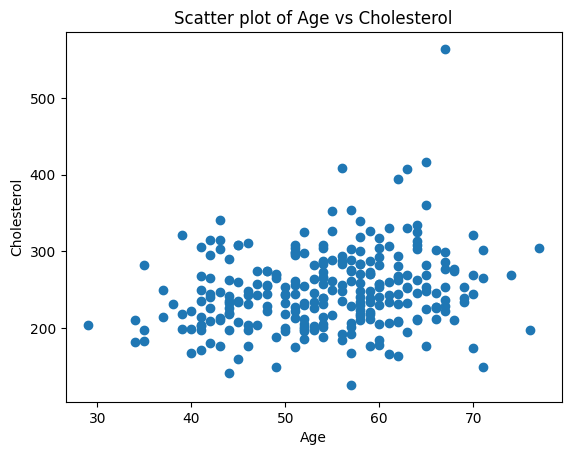

In [10]:
# Scatter plotting shows non-linear and linear relationship between variables.
feature1 = 'Age'
feature2 = 'Cholesterol'

plt.scatter(df[feature1], df[feature2])

plt.title('Scatter plot of {} vs {}'.format(feature1, feature2))
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.show()

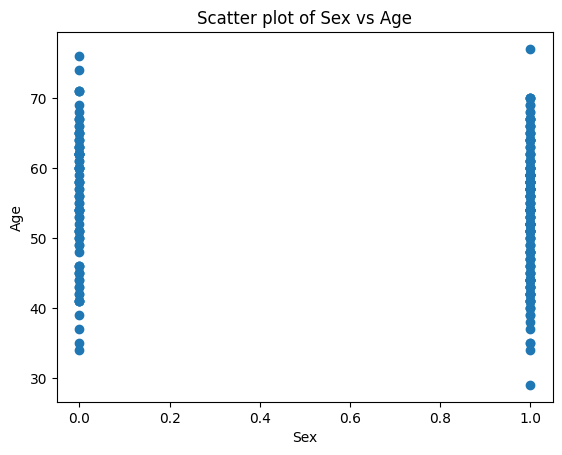

In [11]:
feature1 = 'Sex'
feature2 = 'Age'

plt.scatter(df[feature1], df[feature2])

plt.title('Scatter plot of {} vs {}'.format(feature1, feature2))
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.show()

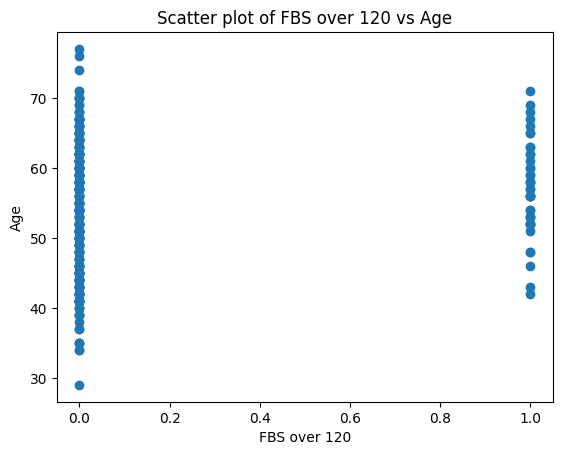

In [12]:
feature1 = 'FBS over 120'
feature2 = 'Age'

plt.scatter(df[feature1], df[feature2])

plt.title('Scatter plot of {} vs {}'.format(feature1, feature2))
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.show()

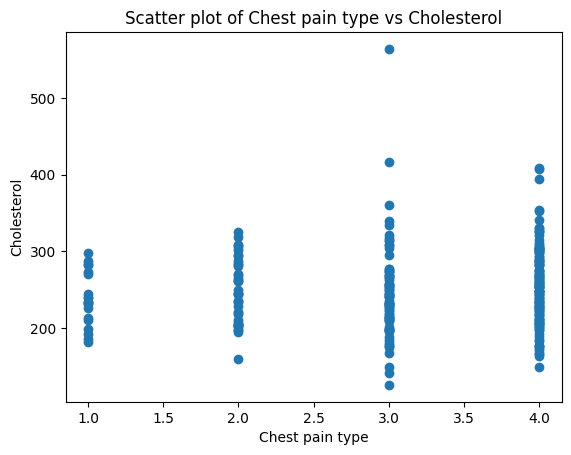

In [13]:
feature1 = 'Chest pain type'
feature2 = 'Cholesterol'

plt.scatter(df[feature1], df[feature2])

plt.title('Scatter plot of {} vs {}'.format(feature1, feature2))
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.show()

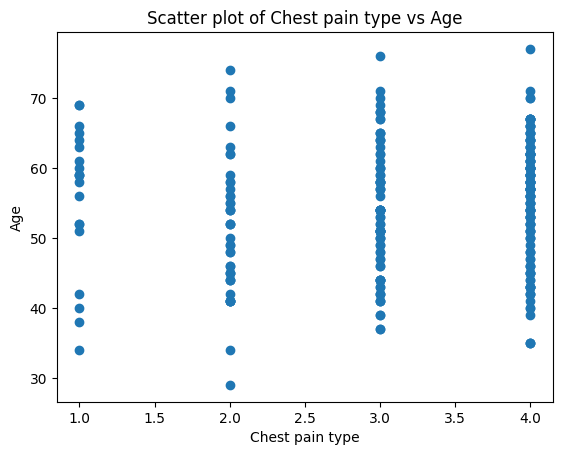

In [14]:
feature1 = 'Chest pain type'
feature2 = 'Age'

plt.scatter(df[feature1], df[feature2])

plt.title('Scatter plot of {} vs {}'.format(feature1, feature2))
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.show()

In [4]:
#Splitting data into input and output.
X = df.iloc[:, 1:14]
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [5]:
y = df.iloc[:, 14]
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [6]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
#Splitting data into training 70%, validation 10% and testing 20%.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=50)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (189, 13)
y_train shape: (189,)
X_val shape: (27, 13)
y_val shape: (27,)
X_test shape: (54, 13)
y_test shape: (54,)


In [15]:
# Training the SVM model.
# Getting classification report.
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc_model = SVC(kernel='linear', C=1, random_state=0)

svc_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [16]:
y_predict = svc_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.80      0.80      0.80        20

    accuracy                           0.85        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



In [18]:
# Evaluating the model on the validation data
val_accuracy = svc_model.score(X_val, y_val)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.8518518518518519


In [20]:
# Evaluating the model on the testing data
test_accuracy = svc_model.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

Testing accuracy: 0.8518518518518519


In [21]:
# Creating confusion matrix to evaluate the performance of the model 
# by comparing its predicted outputs with actual outputs.
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['No Heart Disease', 'Heart Disease']
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

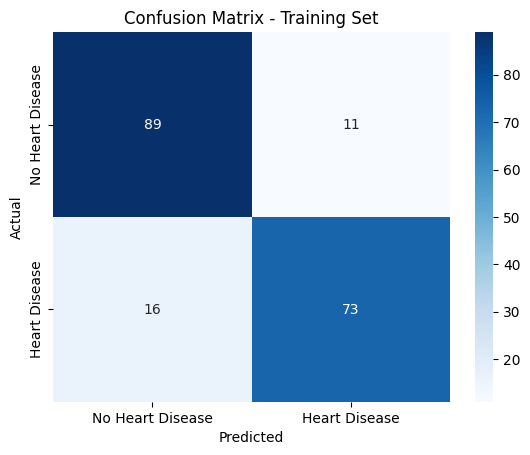

In [22]:
# Making predictions on training set
y_train_pred = svc_model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix - Training Set')

# Out of 100 people that don't have a heart disease, 89 people were correctly classified.
# Out of 89 people that have a heart disease, 73 people were correctly classified.

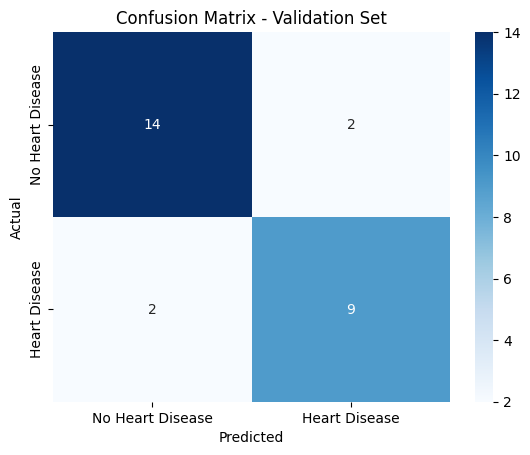

In [23]:
# Making predictions on validation set
y_val_pred = svc_model.predict(X_val)
plot_confusion_matrix(y_val, y_val_pred, 'Confusion Matrix - Validation Set')

# Out of 16 people that don't have a heart disease, 14 people were correctly classified.
# Out of 11 people that have a heart disease, 9 people were correctly classified.

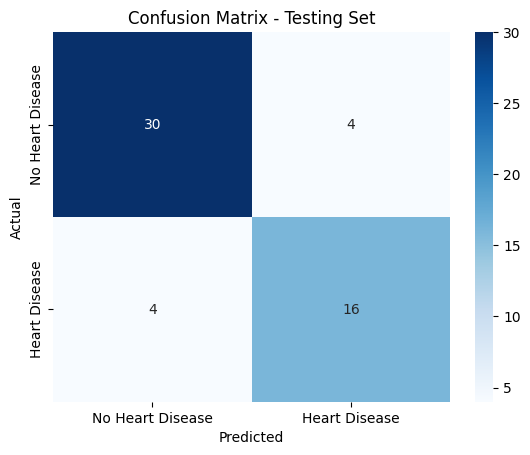

In [24]:
# Making predictions on testing set
y_test_pred = svc_model.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred, 'Confusion Matrix - Testing Set')

# Out of 34 people that don't have a heart disease, 30 people were correctly classified.
# Out of 20 people that have a heart disease, 16 people were correctly classified.

In [ ]:
# The model did well but maybe not absolutely great so, it is curious to try optimization.